# Setntiment Analysis

## Table of Contents

- Introduction
- Text Pre-Processing
- Text Cleaning
- Stop Word Removal
- Tokenization
- Stemming
- Lemmatization
- Natural Language Processing Model
- Training
- Evaluation
- Conclusion

### Introduction

In this notebook, we will do sentiment analysis. We will clean the text dataset, create abd train a model for this purpose.

### Text Pre-Processing

In [4]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

In [5]:
# Read the dataset
df = pd.read_csv('1429_1.csv')

C:\Users\Salma\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [7]:
# List column names
df.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
id                      34660 non-null object
name                    27900 non-null object
asins                   34658 non-null object
brand                   34660 non-null object
categories              34660 non-null object
keys                    34660 non-null object
manufacturer            34660 non-null object
reviews.date            34621 non-null object
reviews.dateAdded       24039 non-null object
reviews.dateSeen        34660 non-null object
reviews.didPurchase     1 non-null object
reviews.doRecommend     34066 non-null object
reviews.id              1 non-null float64
reviews.numHelpful      34131 non-null float64
reviews.rating          34627 non-null float64
reviews.sourceURLs      34660 non-null object
reviews.text            34659 non-null object
reviews.title           34655 non-null object
reviews.userCity        0 non-null float64
reviews.userProvince    0

The columns id, reviews.text, reviews.rating, and reviews.dateSeen are the only columns meaningful to us. So, we will create a dataset the consists of only these two colums.

In [9]:
# Create dataset with the necessary columns only
df = df[['id', 'reviews.text', 'reviews.rating']]

In [10]:
# Replacing thr "." in column names with an "_"
df.columns = df.columns.str.replace('.', '_')

In [11]:
df.head()

,id,reviews_text,reviews_rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0


In [12]:
# Shape of the dataset
df.shape

(34660, 3)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 3 columns):
id                34660 non-null object
reviews_text      34659 non-null object
reviews_rating    34627 non-null float64
dtypes: float64(1), object(2)
memory usage: 812.5+ KB


We can see here that there are some null values.

In [14]:
# Percentage of null values
df.isnull().sum() / df.shape[0] * 100

id                0.000000
reviews_text      0.002885
reviews_rating    0.095211
dtype: float64

The percentage of the missing values is less than 1% in each column. So, we will drop the rows with null values.

In [15]:
# Dropping null values
df.dropna(inplace=True)
# Reset the index 
df.reset_index(inplace=True)

In [16]:
# Check that the values are dropped
df.isnull().sum()

index             0
id                0
reviews_text      0
reviews_rating    0
dtype: int64

In [17]:
# Check if there are duplicate rows
df.duplicated().sum()

0

There are no duplicate rows.

We will change the range of the labels from 1 - 5 to 0 - 4.

In [18]:
# Changing 1 to 0
df.reviews_rating.replace(dict.fromkeys([1], 0), inplace = True)

# Changing 2 to 1
df.reviews_rating.replace(dict.fromkeys([2], 1), inplace = True)

# Changing 3 to 2
df.reviews_rating.replace(dict.fromkeys([3], 2), inplace = True)

# Changing 4 to 3
df.reviews_rating.replace(dict.fromkeys([4], 3), inplace = True)

# Changing 5 to 4
df.reviews_rating.replace(dict.fromkeys([5], 4), inplace = True)

In [19]:
df.reviews_rating.value_counts()

4.0    23774
3.0     8541
2.0     1499
0.0      410
1.0      402
Name: reviews_rating, dtype: int64

Now the labels range from 0 to 4. Class 4 has the most values and class 1 has the least values.

### Text Cleaning

In this section, we will clean our data.

We will make all our text lower case.

In [20]:
# Turn text to lower case
df.reviews_text = df.reviews_text.apply(lambda x : x.lower())

We will remove tags and markups.

In [21]:
# Remove tags and markups
df.reviews_text = df.reviews_text.apply(lambda x : re.compile('<.*?>').sub('', x))

Remove the punctuation in the text.

In [22]:
# Remove punctuation
df.reviews_text = df.reviews_text.apply(lambda x : re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', x))

Remove extra spaces from text.

In [23]:
# Remove extra spaces
df.reviews_text = df.reviews_text.apply(lambda x : re.sub('\s+', ' ', x))

In [24]:
df.reviews_text

0        this product so far has not disappointed my ch...
1        great for beginner or experienced person bough...
2        inexpensive tablet for him to use and learn on...
3        i ve had my fire hd 8 two weeks now and i love...
4        i bought this for my grand daughter when she c...
                               ...                        
34621    this is not appreciably faster than any other ...
34622    amazon should include this charger with the ki...
34623    love my kindle fire but i am really disappoint...
34624    i was surprised to find it did not come with a...
34625    to spite the fact that i have nothing but good...
Name: reviews_text, Length: 34626, dtype: object

### Stop Word Removel

Here, we will remove the stop words from the text.

We need to check the stop words to see if we want to remove something from the list.

In [25]:
# Checking the stop words
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

We will remove the 'not' words from the stopwords list.

In [26]:
# Create a list a words we want to remove from stopwords list
remove_from_list = ['no', 'nor', 'not', 't', 'don', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 
                    'mightn', 'mustn','needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn']

# Remove the words from the stopwords list
for i in stopwords:
    if i in remove_from_list:
        stopwords.remove(i)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very',

Now, we will remove the stop words from the text.

We will create a function that removes the stop words in each text.

In [27]:
df.reviews_text

0        this product so far has not disappointed my ch...
1        great for beginner or experienced person bough...
2        inexpensive tablet for him to use and learn on...
3        i ve had my fire hd 8 two weeks now and i love...
4        i bought this for my grand daughter when she c...
                               ...                        
34621    this is not appreciably faster than any other ...
34622    amazon should include this charger with the ki...
34623    love my kindle fire but i am really disappoint...
34624    i was surprised to find it did not come with a...
34625    to spite the fact that i have nothing but good...
Name: reviews_text, Length: 34626, dtype: object

In [28]:
# Function that removes stopwords
def rem_stop_words(text):
    text = text.split(' ')
    for word in text:
        if word in stopwords:
            text.remove(word)
    return str((' ').join(text))

Then, we will apply this function to the dataset.

In [29]:
# Remove stop words from the dataset
df.reviews_text = df.reviews_text.apply(lambda x : rem_stop_words(x))

In [30]:
df.reviews_text

0        product far not disappointed children love use...
1        great beginner experienced person bought a gif...
2        inexpensive tablet him use learn step from nab...
3        ve my fire hd 8 two weeks love tablet a great ...
4        bought grand daughter she comes visit set up u...
                               ...                        
34621    not appreciably faster 1 8 higher amp charger ...
34622    amazon include charger kindle the fact they ch...
34623    love kindle fire really disappointed kindle po...
34624    was surprised find did not come any type charg...
34625    spite fact nothing good things say amazon anth...
Name: reviews_text, Length: 34626, dtype: object

### Tokenization

We will separate text into tokens.

In [31]:
# Create a for loop to tokenize each row
for i in range(df.shape[0]):
    df.reviews_text[i] = word_tokenize(df.reviews_text[i]) 

C:\Users\Salma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
df.reviews_text

0        [product, far, not, disappointed, children, lo...
1        [great, beginner, experienced, person, bought,...
2        [inexpensive, tablet, him, use, learn, step, f...
3        [ve, my, fire, hd, 8, two, weeks, love, tablet...
4        [bought, grand, daughter, she, comes, visit, s...
                               ...                        
34621    [not, appreciably, faster, 1, 8, higher, amp, ...
34622    [amazon, include, charger, kindle, the, fact, ...
34623    [love, kindle, fire, really, disappointed, kin...
34624    [was, surprised, find, did, not, come, any, ty...
34625    [spite, fact, nothing, good, things, say, amaz...
Name: reviews_text, Length: 34626, dtype: object

### Stemming

We will use stemming to return the words to their root form.

In [33]:
# Initialize the stemmer
snow = SnowballStemmer('english')

# Stem each word in each row
df.reviews_text = df.reviews_text.apply(lambda x : [snow.stem(q) for q in x])
# df.reviews_text = df.reviews_text.apply(lambda x : snow.stem(x))
# snow.stem(df.reviews_text[q]) for q in x

In [34]:
df.reviews_text

0        [product, far, not, disappoint, children, love...
1        [great, beginn, experienc, person, bought, a, ...
2        [inexpens, tablet, him, use, learn, step, from...
3        [ve, my, fire, hd, 8, two, week, love, tablet,...
4        [bought, grand, daughter, she, come, visit, se...
                               ...                        
34621    [not, appreci, faster, 1, 8, higher, amp, char...
34622    [amazon, includ, charger, kindl, the, fact, th...
34623    [love, kindl, fire, realli, disappoint, kindl,...
34624    [was, surpris, find, did, not, come, ani, type...
34625    [spite, fact, noth, good, thing, say, amazon, ...
Name: reviews_text, Length: 34626, dtype: object

### Lemmatization

We will lemmatize the words to their dictionary form

In [35]:
# Initialize the lemmatizer
lemma = WordNetLemmatizer()

# Lemmatize each word in each row
df.reviews_text = df.reviews_text.apply(lambda x : [lemma.lemmatize(q) for q in x])
# df.reviews_text.apply(lambda x : [lemma.lemmatize(q) for q in x])

In [36]:
df.reviews_text

0        [product, far, not, disappoint, child, love, u...
1        [great, beginn, experienc, person, bought, a, ...
2        [inexpens, tablet, him, use, learn, step, from...
3        [ve, my, fire, hd, 8, two, week, love, tablet,...
4        [bought, grand, daughter, she, come, visit, se...
                               ...                        
34621    [not, appreci, faster, 1, 8, higher, amp, char...
34622    [amazon, includ, charger, kindl, the, fact, th...
34623    [love, kindl, fire, realli, disappoint, kindl,...
34624    [wa, surpris, find, did, not, come, ani, type,...
34625    [spite, fact, noth, good, thing, say, amazon, ...
Name: reviews_text, Length: 34626, dtype: object

In [37]:
df.reviews_text = df.reviews_text.apply(lambda x : str(' '.join(x)))

In [38]:
df.reviews_text

0        product far not disappoint child love use and ...
1        great beginn experienc person bought a gift sh...
2        inexpens tablet him use learn step from nabi w...
3        ve my fire hd 8 two week love tablet a great v...
4        bought grand daughter she come visit set up us...
                               ...                        
34621    not appreci faster 1 8 higher amp charger use ...
34622    amazon includ charger kindl the fact they char...
34623    love kindl fire realli disappoint kindl power ...
34624    wa surpris find did not come ani type charg co...
34625    spite fact noth good thing say amazon anth ve ...
Name: reviews_text, Length: 34626, dtype: object

### Natural Language Processing Model

In this section, we will create our train and test sets and vectorize them to be ready for training.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34626 entries, 0 to 34625
Data columns (total 4 columns):
index             34626 non-null int64
id                34626 non-null object
reviews_text      34626 non-null object
reviews_rating    34626 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [40]:
# Separating features and the label
x = df['reviews_text']
y = df['reviews_rating'].astype('int32')

In [41]:
# Create the train and test test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [42]:
x_train

11825    just need someth front face camera allow grand...
8715     is easi use got fun popular app is also quit g...
88       thank a knowledg low pressur salesperson readi...
333      test item i gave a gift is simpl enough the ne...
30630           great product amazon fire tv 1080p qualiti
                               ...                        
13910    amazon fire tablet a nice littl tablet pictur ...
29025    love tap bought a gift love sound qualiti such...
15853    good alittl one game movi pictur not clear not...
10744    wa bought my daughter not stop play sinc she g...
11362    bought one each my kid they love function soun...
Name: reviews_text, Length: 27700, dtype: object

In [43]:
y_train

11825    4
8715     3
88       4
333      3
30630    4
        ..
13910    3
29025    4
15853    2
10744    4
11362    4
Name: reviews_rating, Length: 27700, dtype: int32

Here, we will vectorize our text and turn it into numbers.

In [44]:
vector = CountVectorizer(ngram_range=(1, 1))

vect_train_x = vector.fit_transform(x_train)
vect_train_x = vect_train_x.toarray()
vect_test_x = vector.transform(x_test)
vect_test_x = vect_test_x.toarray()

In [45]:
vocab = vector.get_feature_names()
pd.DataFrame(vect_train_x, columns = vocab).head()

,00,000,000s,01,04,0ff,0ghz,0ne,10,100,...,zero,zeus,zip,zipper,zippi,zombi,zone,zoo,zoom,zwave
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model

In this section, we will create and train our model.

In [46]:
model = XGBClassifier(max_depth=15, n_estimators=100, gamma=2, eta=0.35, n_jobs=4, objective='multi:softmax', 
                      eval_metric='mlogloss', use_label_encoder=False)
model.fit(vect_train_x, y_train, eval_metric='mlogloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.35,
              eval_metric='mlogloss', gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.349999994, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

### Evaluation

We will now evaluate our model on the test set.

In [47]:
y_pred_test = model.predict(vect_test_x)

In [48]:
from sklearn.metrics import multilabel_confusion_matrix

In [49]:
# Confusion matrix
multilabel_confusion_matrix(y_test, y_pred_test)

array([[[6835,   14],
        [  65,   12]],

       [[6830,    8],
        [  84,    4]],

       [[6605,   34],
        [ 259,   28]],

       [[4823,  418],
        [1265,  420]],

       [[ 686, 1451],
        [ 252, 4537]]], dtype=int64)

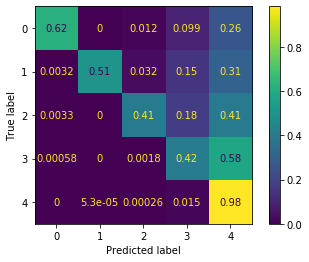

In [50]:
# Confusion matrix
plot_confusion_matrix(estimator=model, X=vect_train_x, y_true=y_train, normalize='true');

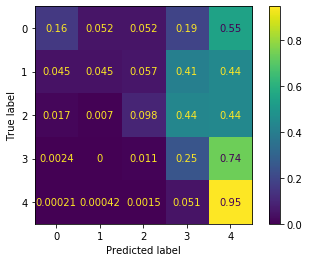

In [51]:
# Confusion matrix
plot_confusion_matrix(estimator=model, X=vect_test_x, y_true=y_test, normalize='true');

The model performs much worse on the test set.

The model does good job predicting class 4 which is the most occuring class in our dataset, but the performance of the model on the rest of the classes is not very good. 

We will see what are the model's accuracy, precision, recall, and f1 score.

In [52]:
acc = accuracy_score(y_test, y_pred_test)
pre = precision_score(y_test, y_pred_test, average='weighted')
rec = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print('Model accuracy: {}'.format(acc))
print('Model precision: {}'.format(pre))
print('Model recall: {}'.format(rec))
print('Model f1 score: {}'.format(f1))

Model accuracy: 0.7220617961305227
Model precision: 0.6739149123753081
Model recall: 0.7220617961305227
Model f1 score: 0.6734429903741297


In [53]:
# Claculating precision, recall, f1 score, and support for each class
metric = precision_recall_fscore_support(y_test, y_pred_test)
metric

(array([0.46153846, 0.33333333, 0.4516129 , 0.50119332, 0.75768203]),
 array([0.15584416, 0.04545455, 0.09756098, 0.24925816, 0.94737941]),
 array([0.23300971, 0.08      , 0.16045845, 0.33293698, 0.84197829]),
 array([  77,   88,  287, 1685, 4789], dtype=int64))

### Neural Network

In [69]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, LSTM
from tensorflow.keras import metrics

In [66]:
lstm_model = tf.keras.Sequential([Embedding(8551, 16, embeddings_initializer="uniform"), 
                                 Bidirectional(LSTM(16, return_sequences=True)), 
                                 Bidirectional(LSTM(16)), 
                                 Dense(8, 'tanh'), 
                                 Dense(5, 'softmax')])
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(vect_train_x, y_train)

Train on 27700 samples
27700/27700 [==============================] - 27087s 978ms/sample - loss: 0.8628 - acc: 0.6854


In [67]:
y_pred = lstm_model.predict(vect_test_x)

In [76]:
# metrics.Recall(y_test.argmax(axis=1), y_pred.argmax(axis=1))

### Conclusion

The model's performance is a little biased because class 4 is the most accuring class.